In [1]:
# import packages
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
#set sns style
sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt


In [5]:
# data
train=pd.read_csv('../src_data/train.csv')
test=pd.read_csv('../src_data/test.csv')

In [6]:
#check the data
train.shape, test.shape

((891, 12), (418, 11))

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# merge train and test
data = train.append(test, ignore_index=True)
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

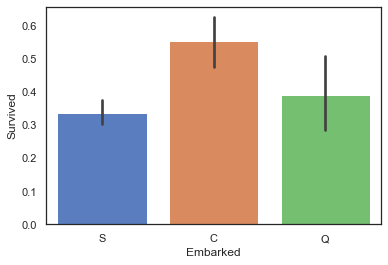

In [10]:
# check the relationshape among features
sns.barplot(data=train, x='Embarked', y='Survived')

In [11]:
# count the survived rate of s q c in train
print('Embarked为"S"的乘客，其生存率为%.2f'%train['Survived'][train['Embarked']=='S'].value_counts(normalize=True)[1])
print('Embarked为"C"的乘客，其生存率为%.2f'%train['Survived'][train['Embarked']=='C'].value_counts(normalize=True)[1])
print('Embarked为"Q"的乘客，其生存率为%.2f'%train['Survived'][train['Embarked']=='Q'].value_counts(normalize=True)[1])

Embarked为"S"的乘客，其生存率为0.34
Embarked为"C"的乘客，其生存率为0.55
Embarked为"Q"的乘客，其生存率为0.39


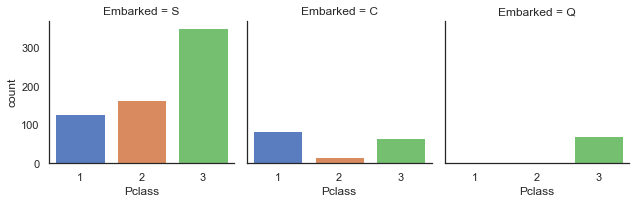

In [12]:
# check the C passenger survived rate
sns.factorplot('Pclass', col='Embarked', data=train, kind='count', size=3)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

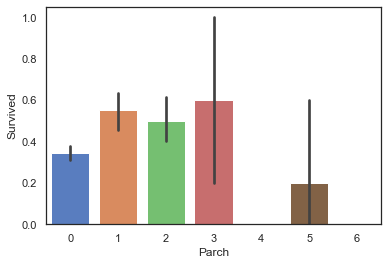

In [13]:
sns.barplot(data=train, x='Parch', y='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

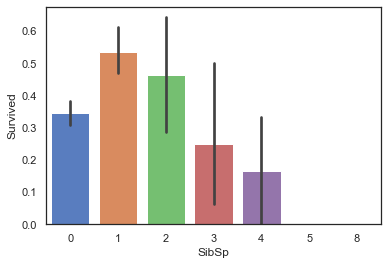

In [14]:
sns.barplot(data=train, x='SibSp', y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

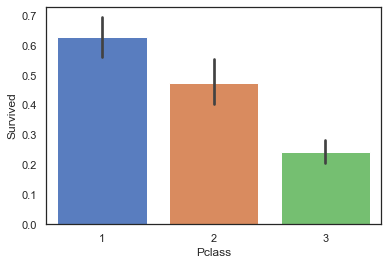

In [15]:
sns.barplot(data=train, x='Pclass', y='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

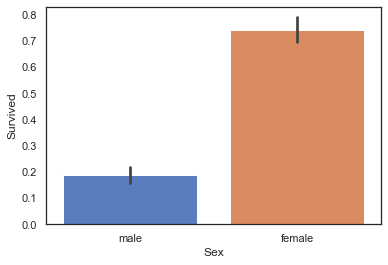

In [17]:
sns.barplot(data=train, x='Sex', y='Survived')

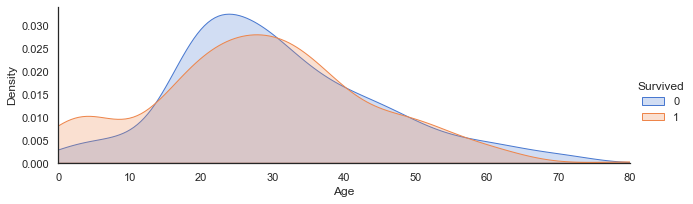

In [20]:
# age Vs survived
ageFacet = sns.FacetGrid(train, hue='Survived', aspect=3)
# figure type
ageFacet.map(sns.kdeplot, 'Age', shade=True)
ageFacet.set(xlim=(0, train['Age'].max()))
ageFacet.add_legend()

In [24]:
train['Fare'].max()

512.3292

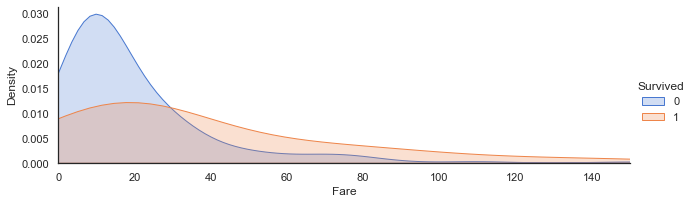

In [23]:
#Fare vs sur
fareFacet = sns.FacetGrid(train, hue='Survived', aspect=3)
fareFacet.map(sns.kdeplot, 'Fare', shade=True)
# fareFacet.set(xlim=(0, train['Fare'].max()))
fareFacet.set(xlim=(0, 150))
fareFacet.add_legend()

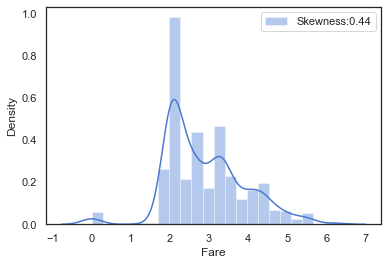

In [66]:
# check Fare distribution
farePlot = sns.distplot(train['Fare'][train['Fare'].notnull()], label='Skewness:%.2f'%(train['Fare'].skew()))  # sns.displot  error
farePlot.legend(loc='best')

In [67]:
# log to rect skewness
train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

1 数据清洗（缺失值以及异常值的处理）

同组识别（找出具有明显同组效应且违背整体规律的数据，对其数据进行修正）
筛选子集（对数据进行降维，选择子集）

In [74]:
train['Survived'].notnull().any()

True

In [75]:
len(train['Survived'].notnull())

891

In [70]:
# check null in each data col
for col in train.columns:
    if data[col].isnull().any(): # col level
            print(f"this {col} col is null")
    else: continue

this Survived col is null
this Age col is null
this Fare col is null
this Cabin col is null
this Embarked col is null


In [83]:
# check which row is null
# train[train['Survived'].isnull()]
# train[train['Age'].isnull()]

In [85]:
# fill null / nan values
data['Cabin'] = data['Cabin'].fillna('U')
data['Embarked'] = data['Embarked'].fillna('U')
data['Fare']=data['Fare'].fillna(data[(data['Pclass']==3)&(data['Embarked']=='S')&(data['Cabin']=='U')]['Fare'].mean())

2特征工程（基于对现有数据特征的理解构造的新特征，以挖掘数据的更多特点）

In [88]:
# 2.1feature generation
data['Title'] = data['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
# check the distribution 
data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Jonkheer          1
Lady              1
Dona              1
Don               1
Sir               1
the Countess      1
Mme               1
Capt              1
Name: Title, dtype: int64

In [90]:
# title integrate
#将title信息进行整合
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

data['Title']=data['Title'].map(TitleDict)
data['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

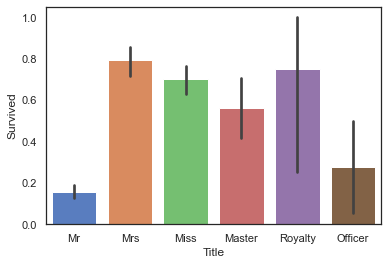

In [91]:
# Title vs Sur
sns.barplot(data=data, x='Title', y='Survived')

<AxesSubplot:xlabel='familyNum', ylabel='Survived'>

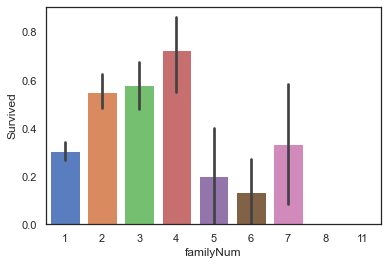

In [93]:
# FamilyNum -> Parch + SibSp
# FamilySize
data['familyNum'] = data['Parch'] + data['SibSp'] + 1
sns.barplot(data=data, x='familyNum', y='Survived')

In [97]:
def familySize(familyNum):
    if familyNum == 1: return 0
    elif (familyNum >=2) & (familyNum<=4): return 1
    else: return 2


In [98]:
data['familySize'] = data['familyNUm'].map(familySize)
data['familySize'].value_counts()

<AxesSubplot:xlabel='familySize', ylabel='Survived'>

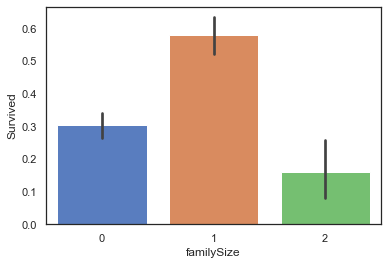

In [100]:
sns.barplot(data=data, x='familySize', y='Survived')

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

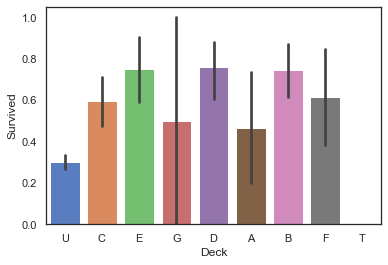

In [101]:
# from Cabin to Deck
data['Deck'] = data['Cabin'].map(lambda x:x[0])
sns.barplot(data=data, x='Deck', y='Survived')

In [102]:
# ticket number to TickCot and TickGroup
TickCountDict = {}
TickCountDict = data["Ticket"].value_counts()
TickCountDict.head()

CA. 2343        11
1601             8
CA 2144          8
347082           7
S.O.C. 14879     7
Name: Ticket, dtype: int64

In [108]:
TickCountDict = data["Ticket"].value_counts()
data['TickCot'] = data['Ticket'].map(data['Ticket'].value_counts())
data['Ticket']

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

<AxesSubplot:xlabel='TickCot', ylabel='Survived'>

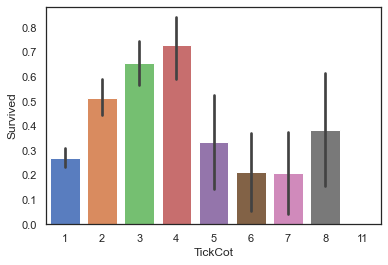

In [110]:
sns.barplot(data=data,x='TickCot',y='Survived')

<AxesSubplot:xlabel='TickGroup', ylabel='Survived'>

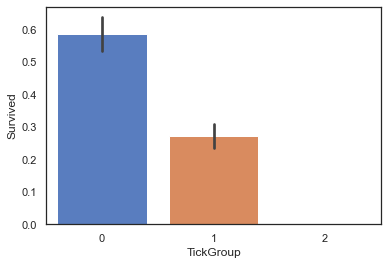

In [111]:
#按照TickCot大小，将TickGroup分为三类。
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
#得到各位乘客TickGroup的类别
data['TickGroup']=data['TickCot'].map(TickCountGroup)
#查看TickGroup与Survived之间关系
sns.barplot(data=data,x='TickGroup',y='Survived')

In [112]:
# fill Age nan value
#筛选数据集
AgePre=data[['Age','Parch','Pclass','SibSp',\
    'Title','familyNum','TickCot']]
#one-hot encoding
AgePre=pd.get_dummies(AgePre)
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')
#查看变量间相关性 # 这个地方还需要改进
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCot         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [113]:
#拼接数据
AgePre=pd.concat([AgePre,ParAge,SibAge,PclAge],axis=1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,3,1,2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,26.0,0,3,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,35.0,0,3,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [114]:
#split train and test
AgeKnown=AgePre[AgePre['Age'].notnull()]
AgeUnKnown=AgePre[AgePre['Age'].isnull()]

#生成实验数据的特征和标签
AgeKnown_X=AgeKnown.drop(['Age'],axis=1)
AgeKnown_y=AgeKnown['Age']

#生成预测数据的特征
AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

#利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)


RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [115]:
# score
rfr.score(AgeKnown_X,AgeKnown_y)

0.5873477482460594

In [128]:
#预测年龄
AgeUnKnown_y=rfr.predict(AgeUnKnown_X)

In [127]:
#填充预测数据
data.loc[['Age'].isnull(),['Age']]=AgeUnKnown_y
data.info()  #此时已无缺失值

AttributeError: 'list' object has no attribute 'isnull'

虽然通过分析数据已有特征与标签的关系可以构建有效的预测模型，但是部分具有明显共同特征的用户可能与整体模型逻辑并不一致。如果将这部分具有同组效应的用户识别出来并对其数据加以修正，就可以有效提高模型的准确率。在Titancic案例中，我们主要探究相同姓氏的乘客是否存在明显的同组效应。

提取两部分数据，分别查看其“姓氏”是否存在同组效应（因为性别和年龄与乘客生存率关系最为密切，因此用这两个特征作为分类条件）：

12岁以上男性：找出男性中同姓氏均获救的部分；
女性以及年龄在12岁以下儿童：找出女性及儿童中同姓氏均遇难的部分。

In [129]:
#提取乘客的姓氏及相应的乘客数
data['Surname']=data['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict={}
SurNameDict=data['Surname'].value_counts()
data['SurnameNum']=data['Surname'].map(SurNameDict)

#将数据分为两组
MaleDf=data[(data['Sex']=='male')&(data['Age']>12)&(data['familyNum']>=2)]
FemChildDf=data[((data['Sex']=='female')|(data['Age']<=12))&(data['familyNum']>=2)]

In [130]:
#分析男性同组效应
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()

0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64

In [131]:
#获得生存率为1的姓氏
MSurNamDict={}
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict

Index(['Beane', 'Beckwith', 'Bishop', 'Cardeza', 'Chambers', 'Dick',
       'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
       'Greenfield', 'Harder', 'Hoyt', 'Kimball', 'Lindqvist', 'McCoy',
       'Nakid', 'Persson', 'Taylor'],
      dtype='object', name='Surname')

In [132]:
#分析女性及儿童同组效应
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()

1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

In [133]:
#获得生存率为0的姓氏
FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
       'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
       'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
       'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
       'Vander Planke', 'Zabour'],
      dtype='object', name='Surname')

In [134]:
#对数据集中这些姓氏的男性数据进行修正：1、性别改为女；2、年龄改为5。
data.loc[(data['Survived'].isnull())&(data['Surname'].isin(MSurNamDict))&(data['Sex']=='male'),'Age']=5
data.loc[(data['Survived'].isnull())&(data['Surname'].isin(MSurNamDict))&(data['Sex']=='male'),'Sex']='female'

#对数据集中这些姓氏的女性及儿童的数据进行修正：1、性别改为男；2、年龄改为60。
data.loc[(data['Survived'].isnull())&(data['Surname'].isin(FCSurNamDict))&((data['Sex']=='female')|(data['Age']<=12)),'Age']=60
data.loc[(data['Survived'].isnull())&(data['Surname'].isin(FCSurNamDict))&((data['Sex']=='female')|(data['Age']<=12)),'Sex']='male'

In [143]:
# 筛选子集
#人工筛选
dataSel=data.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
#查看各特征与标签的相关性
corrDf=pd.DataFrame()
corrDf=dataSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.059733
SibSp        -0.035322
familyNUm     0.016639
familyNum     0.016639
TickCot       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.257307
Survived      1.000000
Name: Survived, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Fare'),
  Text(3.5, 0, 'Parch'),
  Text(4.5, 0, 'Pclass'),
  Text(5.5, 0, 'SibSp'),
  Text(6.5, 0, 'familyNum'),
  Text(7.5, 0, 'familySize'),
  Text(8.5, 0, 'TickCot'),
  Text(9.5, 0, 'TickGroup')])

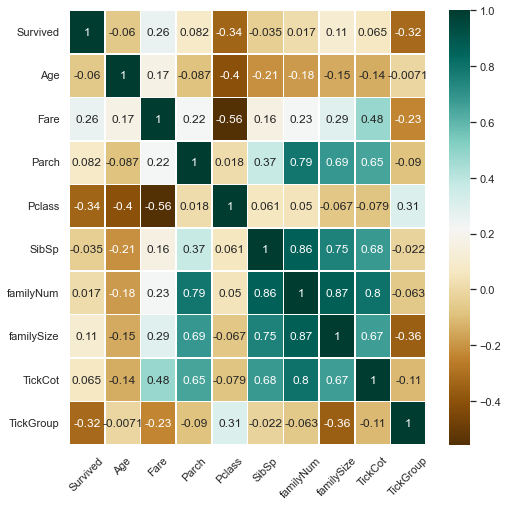

In [144]:
#热力图，查看Survived与其他特征间相关性大小
plt.figure(figsize=(8,8))
sns.heatmap(dataSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [147]:
# dataSel=dataSel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1) 
# # 这里应该重新命名，会导致冲突
#one-hot编码
dataSel=pd.get_dummies(dataSel)
PclassDf=pd.get_dummies(data['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(data['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(data['familySize'],prefix='familySize')
fullSel=pd.concat([dataSel,PclassDf,TickGroupDf,familySizeDf],axis=1)

In [149]:
#拆分实验数据与预测数据
experData=dataSel[dataSel['Survived'].notnull()]
preData=dataSel[dataSel['Survived'].isnull()]

experData_X=experData.drop('Survived',axis=1)
experData_y=experData['Survived']
preData_X=preData.drop('Survived',axis=1)


# 构建模型


In [154]:
#导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.pipeline import Pipeline
#设置kfold，交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10)

In [160]:
# pipe = Pipeline([('svc', SVC()), ('dtc', DecisionTreeClassifier),('rfc', RandomForestClassifier())
# ('etc',ExtraTreesClassifier()), ('gbc', GradientBoostingClassifier()),
# ('knc', KNeighborsClassifier()), ('lr', LogisticRegression()),
# ('lda', LinearDiscriminantAnalysis())])


In [161]:
#汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [162]:
#不同机器学习交叉验证结果汇总
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))

In [163]:
#求出模型得分的均值和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
#汇总数据
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})



In [164]:
cvResDf

,cv_mean,cv_std,algorithm
0,0.682497,0.054128,SVC
1,0.775605,0.059731,DecisionTreeCla
2,0.806991,0.047987,RandomForestCla
3,0.803620,0.039475,ExtraTreesCla
4,0.831685,0.048567,GradientBoostingCla
5,0.739638,0.024788,KNN
6,0.827191,0.032834,LR
7,0.830574,0.033197,LinearDiscrimiAna


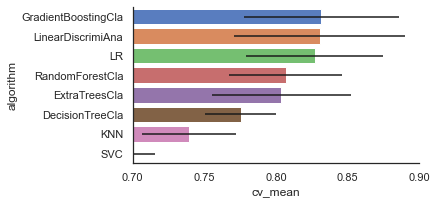

In [165]:
# sns.barplot(data=cvResDf,x='cv_mean',y='algorithm',**{'xerr':cv_std})

cvResFacet=sns.FacetGrid(cvResDf.sort_values(by='cv_mean',ascending=False),sharex=False,
            sharey=False,aspect=2)
cvResFacet.map(sns.barplot,'cv_mean','algorithm',**{'xerr':cv_std},
               palette='muted')
cvResFacet.set(xlim=(0.7,0.9))
cvResFacet.add_legend()

In [166]:
#GradientBoostingClassifier模型
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(experData_X,experData_y)

#LogisticRegression模型
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(experData_X,experData_y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [167]:
#modelgsGBC模型
print('modelgsGBC模型得分为:%.3f'%modelgsGBC.best_score_)
#modelgsLR模型
print('modelgsLR模型得分为:%.3f'%modelgsLR.best_score_)

modelgsGBC模型得分为:0.837
modelgsLR模型得分为:0.831


<Figure size 432x288 with 0 Axes>

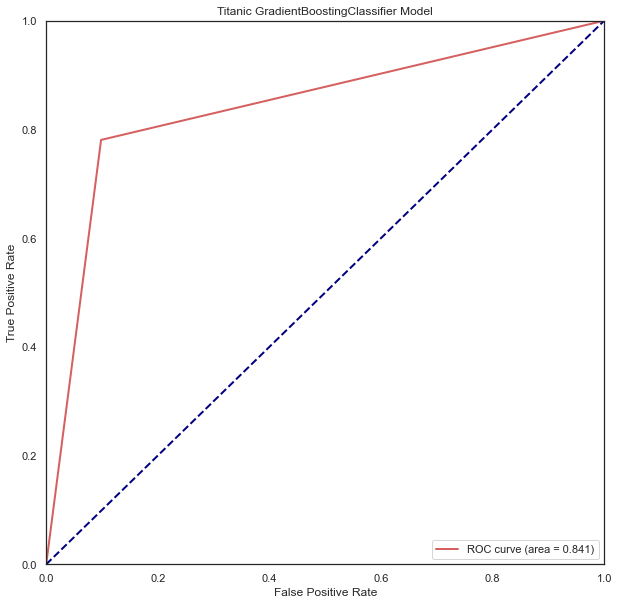

In [168]:
#查看模型ROC曲线
#求出测试数据模型的预测值
modelgsGBCtestpre_y=modelgsGBC.predict(experData_X).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsGBCtestpre_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()

In [169]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
print('GradientBoostingClassifier模型混淆矩阵为\n',confusion_matrix(experData_y.astype(int).astype(str),modelgsGBCtestpre_y.astype(str)))
print('LinearRegression模型混淆矩阵为\n',confusion_matrix(experData_y.astype(int).astype(str),testpre_y.astype(str)))

GradientBoostingClassifier模型混淆矩阵为
 [[495  54]
 [ 75 267]]


NameError: name 'testpre_y' is not defined

In [172]:
#TitanicGBSmodle
GBCpreData_y=modelgsGBC.predict(preData_X)
GBCpreData_y=GBCpreData_y.astype(int)
#导出预测结果
GBCpreResultDf=pd.DataFrame()
GBCpreResultDf['PassengerId']=data['PassengerId'][data['Survived'].isnull()]
GBCpreResultDf['Survived']=GBCpreData_y
GBCpreResultDf
#将预测结果导出为csv文件

GBCpreResultDf.to_csv('../result/TitanicGBSmodle.csv',index=False)